## Machine Learning für Computer Vision  SoSe 2022


### Praktikum 11

AutoEncoder: Wie gut funktionieren Autoencoder auf dem101-Datensatz?


In [69]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow import keras
assert tf.__version__ >= "2.0"
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib as mpl
# from keras.utils import to_categorical

In [70]:
print(tf.__version__)

2.8.0


Fügen Sie hier den Pfad zu dem 101 Ordner ein. Je nach Prozessor/GPU verwenden sie nicht alle Unterordner sondern nur eine Teilmenge.
Skalieren Sie die Bilder auf die Größe 50x50 Pixel und konvertieren Sie die Bilder in Grauwertbilder.

In [71]:
dataset_dir = "101_special"
data_dir = pathlib.Path(dataset_dir)

In [72]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2667


Speichern Sie die Bilder und die Labels in die Variablen x und y. Die Bilder werden alle auf die gleiche Größe skaliert und sollen mit der Funktion norm(.) . 

In [73]:
batch_size = 32
IMG_HEIGHT = 50
IMG_WIDTH = 50

In [74]:
def norm(im):
    return (im - np.min(im)) / (np.max(im) - np.min(im))

In [75]:
ignored = {".DS_Store", "LICENSE.txt"}
categories = [data_dir.name+'/'+x+'/' for x in os.listdir(data_dir) if x not in ignored]

In [76]:
categories

['101_special/airplanes/',
 '101_special/camera/',
 '101_special/chair/',
 '101_special/Faces_easy/',
 '101_special/Motorbikes/',
 '101_special/revolver/',
 '101_special/sunflower/',
 '101_special/watch/',
 '101_special/windsor_chair/',
 '101_special/yin_yang/']

In [77]:
import cv2

x = []
y = []

counter = 0
for eachPath in categories:
    labelName = eachPath[12:-1]
    # print(labelName)
    for eachImageFile in os.listdir(eachPath):
        # print(eachPath + eachImageFile)
        x.append(norm(cv2.imread(eachPath + eachImageFile, cv2.IMREAD_GRAYSCALE)))
        y.append(labelName)

print(x[1])


[[1.         1.         1.         ... 0.70196078 0.70588235 0.70980392]
 [1.         1.         1.         ... 0.69803922 0.69803922 0.70588235]
 [1.         1.         1.         ... 0.69411765 0.69411765 0.69803922]
 ...
 [1.         1.         1.         ... 0.67843137 0.67843137 0.6745098 ]
 [1.         1.         1.         ... 0.67058824 0.6745098  0.66666667]
 [1.         1.         1.         ... 0.66666667 0.66666667 0.6627451 ]]


ValueError: cannot reshape array of size 73784 into shape (50,50)

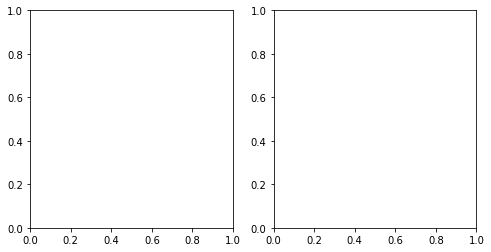

In [78]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].imshow(np.reshape(x[1], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
ax[1].imshow(np.reshape(x[-500], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')

In [ ]:
#divide the data into training and test data
test_idx = random.sample(range(0, x.shape[0]), int(x.shape[0]*0.1))
x_test = x[test_idx]
x_train = np.delete(x, test_idx, 0)
y_test = y[test_idx]
y_train = np.delete(y, test_idx, 0)

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].imshow(np.reshape(x_test[1], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
ax[1].imshow(np.reshape(x_test[11], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')

### Alle layer werden gleichzeitig trainiert

Implementieren Sie den stacked autoencoder von Folie 11. Als Metrik wird die rounded accuracy benutzt. Für die Visualisierung der Daten können Sie die Funktion show_reconstructions verwenden.

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
def show_reconstructions(model, images=x_test, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray")
    plt.axis("off")

In [ ]:
show_reconstructions(stacked_ae, images=x_test[7:12])

### Visualsierung der Daten

Benutzen Sie PCA und tSNE um die gelernten Codierungen zu visualisieren.
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
X_valid_new = stacked_encoder.predict(x_train)

In [ ]:
#Using PCA
from sklearn.decomposition import PCA

In [ ]:
#Using tSNE
from sklearn.manifold import TSNE

Visualisieren Sie einzelne Datenpukte von den unterschiedlichen Clustern.
Siehe Beispiel: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [ ]:
#Für PCA

In [ ]:
#Für tSNE

### Generieren von neuen Beispielen

Benutzen sie einen variational autoencoder, um neue Daten zu generieren (s. Folien 25-27)

In [ ]:
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [ ]:
show_reconstructions(variational_ae)

Interpolieren sie die gelernten Codierungen, um neue Beispiel zu erzeugen. Sie können zum Anzeigen der Bilder die Funktion plot_multiple_images benutzen.

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="gray")
        plt.axis("off")

In [ ]:
plot_multiple_images(images, 4)

### Generative Adversarial Networks
Implementieren sie die GAN-Architektur aus der Vorlesung, Folie 37. Zum Anzeogen der Zwischenergebnisse können Sie die Funktion train_gan benutzen. 

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, np.squeeze(X_batch)], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()           

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10)

### GAN mit CNNs 
Wie sieht das Ergebnis aus, wenn Sie CNNs verwenden? (s. Folie 37)